# Denoising using a TV-2 filter
In this demo we show how to use the ISS filter described in [Nonlinear inverse scale space methods
M Burger, G Gilboa, S Osher, J Xu - Communications in Mathematical Sciences, 2006](https://scholar.google.de/scholar?oi=bibs&cluster=5467212650801398982&btnI=1&hl=en)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import advancedfilters as af

## Make some test data
The test data is a cubic volume with an inner cube set to one surrounded by zeros. Gaussian noise is added to the image. It is important that the data has the type float32.

In [18]:
def buildTestVolume(size,sigma) :
    vol = np.zeros([size,size,size])
    margin = size // 4
    vol[margin:-margin,margin:-margin,margin:-margin]=1
    vol = vol + np.random.normal(0,1,size=vol.shape)*sigma
    
    return vol.astype('float32')

The cube has the dimensions 40x40x40 voxels and the StdDev of the noise is 0.5.

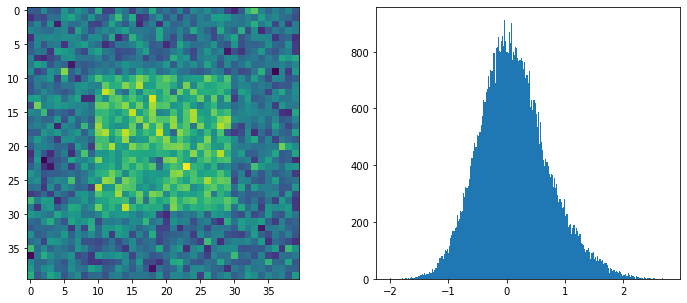

In [101]:
vol  = buildTestVolume(40,0.5)

fig,ax = plt.subplots(1,2,figsize=[12,5])

ax[0].imshow(vol[20]);
ax[1].hist(vol.ravel(),bins=256);

The filter operates inplace, therefore we make a deep copy of the image to be able to compare the performance of the filter.

In [104]:
fvol = vol.copy() 

In [105]:
iss=af.ISSfilter3D()

In [106]:
iss.setInitialImageType(af.InitialImageOriginal)
iss.setRegularizationType(af.RegularizationTV2)
fvol = vol.copy()

# Normalize
m = vol.mean()
s = vol.std() 
fvol = (fvol-m)/s

# Run the filter inplace
iss.process(fvol,tau=0.125,plambda=1,palpha=0.25,N=10)

# Rescale
fvol = s*fvol + m
error = iss.errors()

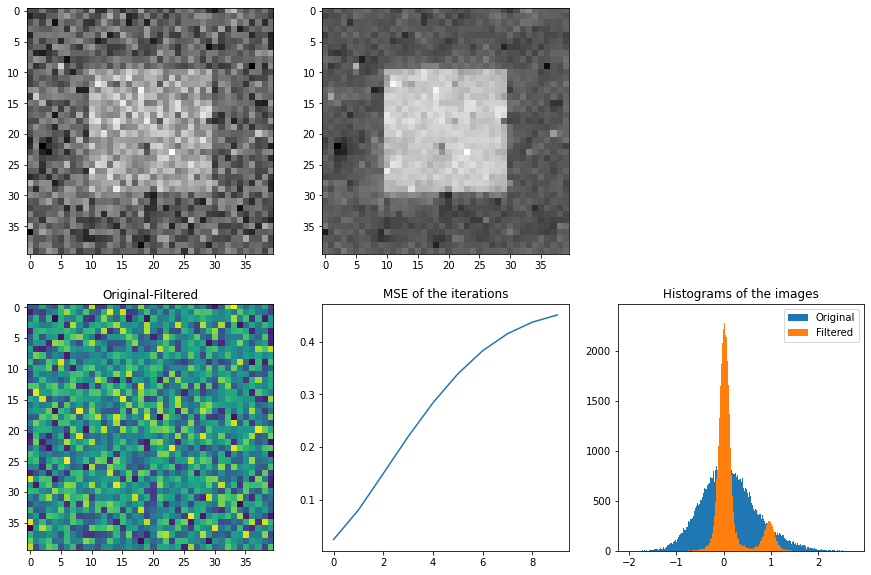

In [108]:
fig,ax=plt.subplots(2,3,figsize=[15,10])
ax = ax.ravel()
ax[0].imshow(vol[20],cmap='gray'); 
ax[1].imshow(fvol[20],cmap='gray')
ax[2].axis('off')
ax[3].imshow(vol[20]-fvol[20]); ax[3].set_title('Original-Filtered')
ax[4].plot(error); ax[4].set_title('MSE of the iterations');
ax[5].hist(vol.ravel(), bins=256,label='Original');
ax[5].hist(fvol.ravel(), bins=256,label='Filtered');
ax[5].legend();
ax[5].set_title('Histograms of the images');